In [3]:
#WEEK 1:
import os
import pandas as pd

# Build path to the CSV relative to this notebook:
# notebooks/ -> go up one level (..) -> into data/ -> telco_churn.csv
data_path = os.path.join("..", "data", "telco_churn.csv")

print("Data path:", os.path.abspath(data_path))

# Load dataset
df = pd.read_csv(data_path)

# Show first few rows
df.head()


Data path: c:\Users\Naada Hussein\OneDrive\Desktop\customer-churn-prediction\data\telco_churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### WEEK 2 CHECKING AND HANDLING REMAINING VALUES

In [4]:
#Number of rows and columns
df.shape


(7043, 21)

In [5]:
#Data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Check for missing values
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Check data type of 'TotalCharges' column
df["TotalCharges"].dtype

dtype('O')

In [8]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [9]:
# Check for missing values in 'TotalCharges' after conversion
df["TotalCharges"].isnull().sum()

np.int64(11)

In [10]:
# Drop rows with missing 'TotalCharges' values
df = df.dropna(subset=["TotalCharges"]).reset_index(drop=True)

In [11]:
# Check data type of 'TotalCharges' column after conversion
df["TotalCharges"].dtype

dtype('float64')

### Fixing Data Types

In the original dataset, the column **TotalCharges** was incorrectly stored as a string (**object**) instead of a numeric type. This happened because some rows contained blank values.

To fix this:
- We converted the column to numeric using pd.to_numeric(errors="coerce"), which turns invalid entries into **NaN**.
- Then we removed the rows with missing *TotalCharges* values, since they represented a very small portion of the dataset and would cause issues during model training.

Now **TotalCharges** is correctly stored as **float64**.


In [12]:
#Check for missing values
df.isnull().sum()
df.isnull().sum().sum()

np.int64(0)

### Handling Missing Values

After fixing the **TotalCharges** column, We checked the rest of the dataset for any additional missing values using df.isnull().sum().

The dataset did not contain any other missing values, so no further cleaning was required. If missing values had been present, We would have handled them by filling:
- numeric columns with the median
- categorical columns with the most frequent value (mode)


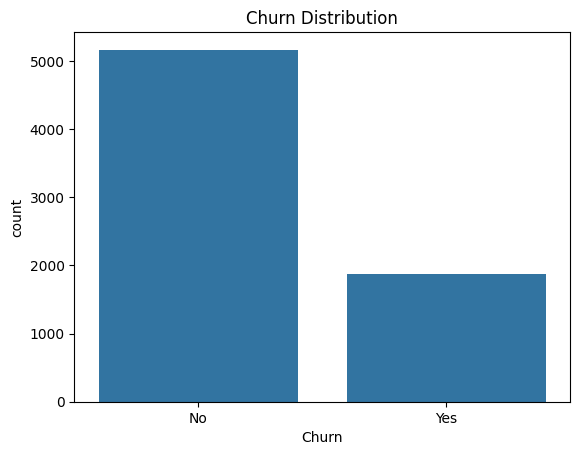

In [13]:
#Visualizing the Churn Distribution
#This shows how many customers have churned vs how many have not. From this we can see that the dataset is somewhat imbalanced, with more customers not churning than those who do. 
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

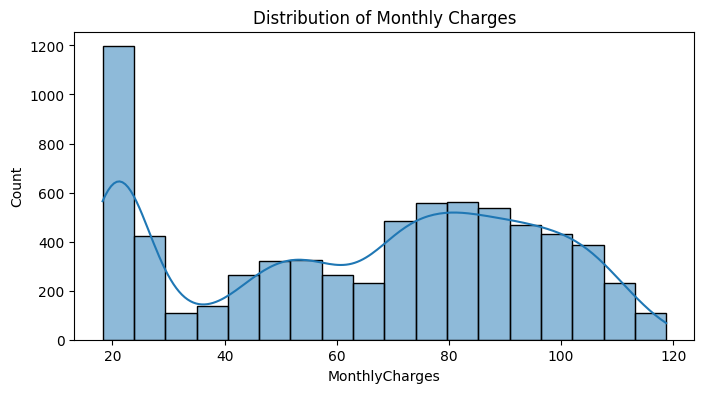

In [14]:
#Distribution of monthly Charges
#Customers are charged different amounts monthly based on their service plans. This plot shows how these charges are distributed across all customers. Customers with higher monthly charges might be more likely to churn if they don't perceive enough value in the service. 
plt.figure(figsize=(8,4))
sns.histplot(df["MonthlyCharges"], kde=True)
plt.title("Distribution of Monthly Charges")
plt.show()

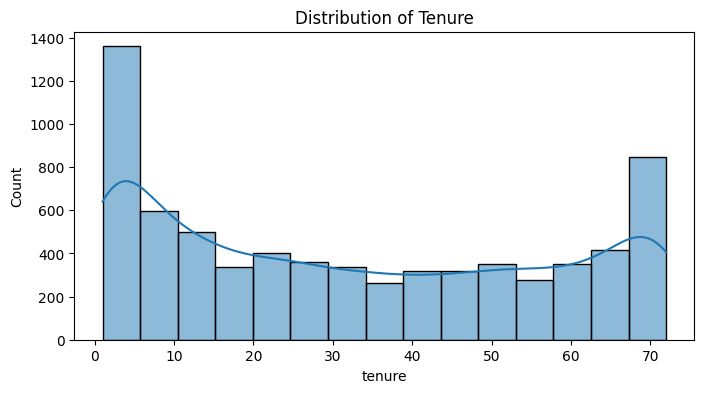

In [15]:
#Distribution of Tenure
#Tenure indicates how long a customer has been with the company. This plot shows the distribution of customer tenure. Customers with shorter tenure might be more likely to churn as they haven't established a strong relationship with the service provider yet. From the plot we can see that a significant number of customers have a tenure of less than 20 months.
plt.figure(figsize=(8,4))
sns.histplot(df["tenure"], kde=True)
plt.title("Distribution of Tenure")
plt.show()


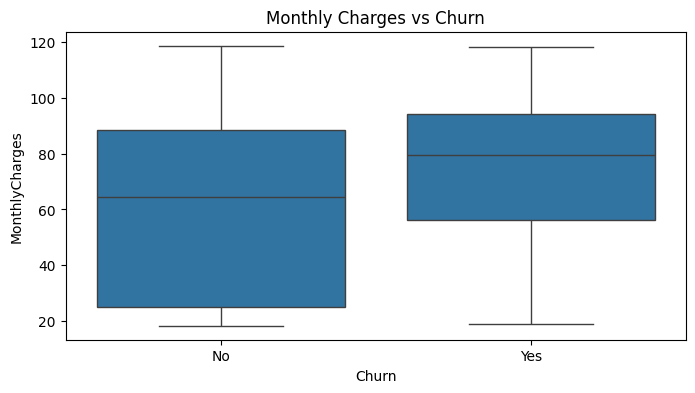

In [16]:
#Relationship between Monthly Charges and Churn
#This box plot visualizes the relationship between monthly charges and churn status. It helps to see if customers who churn tend to have higher or lower monthly charges compared to those who stay. From this plot we can see that customers who churn generally have higher monthly charges.
plt.figure(figsize=(8,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

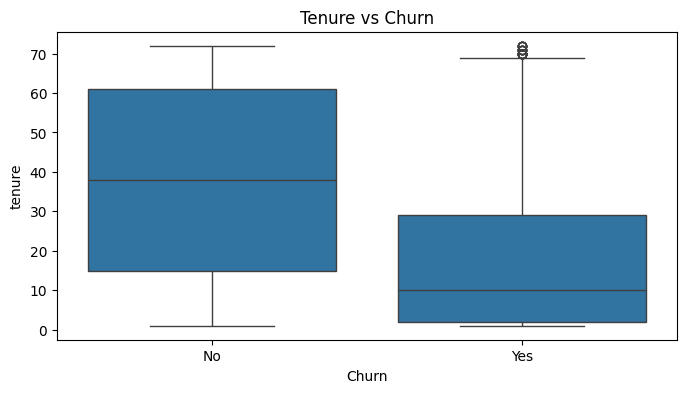

In [17]:
#Relationship between Tenure and churn
#This box plot shows the relationship between customer tenure and churn status. It helps to identify if customers with shorter tenure are more likely to churn compared to those with longer tenure. From the plot we can see that customers who churn tend to have shorter tenure.
plt.figure(figsize=(8,4))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


### Key Insights from EDA

- Customers who churn tend to have **higher monthly charges** compared to those who stay.
- Customers with **shorter tenure** (less time with the company) are more likely to churn.
- Churn is not balanced: more customers do not churn than those who do. This may impact the evaluation later and should be considered when comparing models.


In [18]:
#Encoding the target variable
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df["Churn"].value_counts()


Churn
0    5163
1    1869
Name: count, dtype: int64

In [19]:
#Identifying categorical and numerical columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "bool"]).columns.tolist()

numeric_cols, categorical_cols

(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'],
 ['customerID',
  'gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'])

In [20]:
#Creating dummy variables for categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [21]:
#Separating features (X) and target variable (y)
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]


In [22]:
#Train-test split (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((5625, 7061), (1407, 7061))

### Feature Engineering and Preprocessing

- The target variable **Churn** was encoded as 1 (Yes) and 0 (No) to allow machine learning models to process it.
- Categorical variables were one-hot encoded using **pd.get_dummies()**, which converts categories into numeric columns.
- The dataset was split into training (80%) and testing (20%) sets using **train_test_split** with **stratify=y** to maintain the class balance.


### WEEK 3 - FEATURE ENGINEERING & MODEL  PREP

In [23]:
#Feature Engineering: Creating AvgMonthlySpend
df_encoded["AvgMonthlySpend"] = df_encoded["TotalCharges"] / (df_encoded["tenure"].replace(0, 1))

df_encoded[["TotalCharges", "tenure", "AvgMonthlySpend"]].head()

,TotalCharges,tenure,AvgMonthlySpend
0,29.85,1,29.850000
1,1889.50,34,55.573529
2,108.15,2,54.075000
3,1840.75,45,40.905556
4,151.65,2,75.825000


### New Feature: Average Monthly Spend

We created a new feature called **AvgMonthlySpend**, calculated as:

\[
\text{AvgMonthlySpend} = \frac{\text{TotalCharges}}{\text{tenure}}
\]

For customers with tenure = 0, we replaced it with 1 to avoid division by zero.

This feature helps capture how quickly a customer is spending money, which can influence churn. For example:
- Customers with **high average spend** but **short tenure** may be more likely to churn if they feel overcharged.


In [24]:
#updating X and y to include the new feature
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]


In [25]:
#Retrain-test split (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


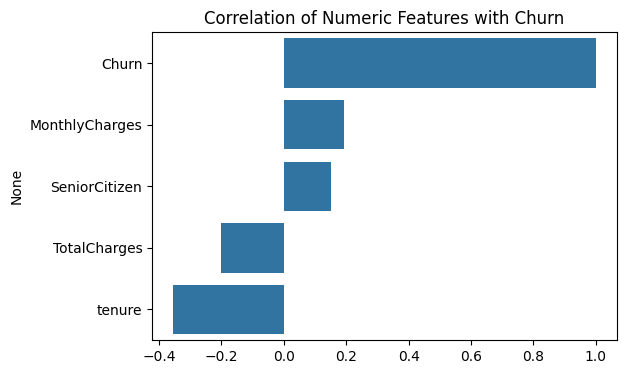

In [26]:
#Converting TotalCharges to Numeric
numeric_corr = df.corr(numeric_only=True)["Churn"].sort_values(ascending=False)
numeric_corr
#Plotting the correlations. This helps to identify which numeric features are most strongly associated with churn. 
plt.figure(figsize=(6, 4))
sns.barplot(x=numeric_corr.values, y=numeric_corr.index)
plt.title("Correlation of Numeric Features with Churn")
plt.show()


### Feature Selection (Correlation Analysis)

To understand which features are most related to churn, We computed the correlation between the numeric variables and the target **Churn**.

Key observations:
- **Tenure** has a negative correlation with churn: customers who stay longer are less likely to leave.
- **MonthlyCharges** has a positive correlation with churn: customers with higher monthly bills are more likely to churn.
- **TotalCharges** also shows a relationship with churn, but it is influenced by both tenure and monthly charges.

This simple correlation analysis helps confirm that contract length, tenure, and billing amounts are important features to include in the models.


In [27]:
#Re-encoding categorical variables after adding new feature
categorical_cols = df.select_dtypes(include=["object", "bool"]).columns.tolist()

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((5625, 7062), (1407, 7062))

### Final Dataset Preparation for Modelling

To prepare the data for machine learning models:

- We one-hot encoded all categorical variables using **pd.get_dummies(drop_first=True)** to convert them into numeric format.
- We separated the dataset into features (**x**) and target (**y**), where **Churn** is the target variable.
- We split the dataset into training (80%) and testing (20%) sets using **train_test_split** with **stratify=y** to maintain the churn ratio in both sets.

This ensures that the dataset is properly structured for the modelling stage.


### WEEK 4 - MODEL BUILDING

### Model 1: Logistic Regression (Baseline Model)

Logistic Regression serves as the baseline model for this project.  
It is simple, fast, and effective for binary classification problems such as churn prediction.

In our results, Logistic Regression performed surprisingly well:
- It achieved the **highest Recall** and **highest F1-score** among all models.
- This means it was the best at detecting customers who are likely to churn.
- Despite being the simplest model, it provided the most balanced performance.

This shows that simpler linear models can outperform more complex ones depending on the dataset.


In [29]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Creating the model
log_reg_model = LogisticRegression(max_iter=10000)

# Training the model
log_reg_model.fit(X_train, y_train)

# Make predictions
log_reg_pred = log_reg_model.predict(X_test)

log_reg_pred[:10]  # Show first 10 predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

### Logistic Regression Convergence Warning

While training Logistic Regression, we received a convergence warning.  
This happens because Logistic Regression can struggle to converge when:
- There are many one-hot encoded features
- The dataset has features with different scales
- The model reaches the iteration limit

To fix this, we increased `max_iter` to 10000.  
The model trained successfully and produced valid predictions.


In [30]:
#Performance Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)

log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1


(0.8017057569296375,
 0.6452599388379205,
 0.5641711229946524,
 0.6019971469329529)

### Model 2: Random Forest

Random Forest is a popular ensemble method that usually improves prediction accuracy by combining many decision trees.

However, in this project:
- Random Forest did **not** perform as well as expected.
- Although its precision was similar to Logistic Regression, its **Recall was significantly lower**.
- The lower Recall means it missed many customers who actually churned.
- As a result, its F1-score was the lowest of all three models.

This shows that Random Forest may struggle when the dataset has many one-hot encoded categorical features or class imbalance.


In [31]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1  # use all CPU cores to speed up
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

rf_pred[:10]  # show first 10 predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [32]:
#performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

rf_accuracy, rf_precision, rf_recall, rf_f1


(0.7924662402274343,
 0.6507352941176471,
 0.4732620320855615,
 0.5479876160990712)

### Model 3: Gradient Boosting

Gradient Boosting is an advanced ensemble method that builds trees sequentially to correct previous errors.

In this project:
- Gradient Boosting performed better than Random Forest.
- It achieved the **highest precision**, meaning it was good at identifying true churners.
- However, its **Recall and F1-score were lower** than Logistic Regression.
- Overall, it provided mid-level performance—better than Random Forest but not better than Logistic Regression.

This result highlights that more complex models do not always guarantee superior performance.


In [33]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

# Train model
gb_model.fit(X_train, y_train)

# Predictions
gb_pred = gb_model.predict(X_test)

gb_pred[:10]


array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [34]:
#performance evaluation
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)

gb_accuracy, gb_precision, gb_recall, gb_f1


(0.7960199004975125,
 0.6559139784946236,
 0.4893048128342246,
 0.5604900459418071)

### WEEK 5 - MODEL EVALUATION AND REPORTING

In [35]:
#Combining results
import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    "Accuracy": [log_reg_accuracy, rf_accuracy, gb_accuracy],
    "Precision": [log_reg_precision, rf_precision, gb_precision],
    "Recall": [log_reg_recall, rf_recall, gb_recall],
    "F1 Score": [log_reg_f1, rf_f1, gb_f1]
})

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.801706,0.645260,0.564171,0.601997
1,Random Forest,0.792466,0.650735,0.473262,0.547988
2,Gradient Boosting,0.796020,0.655914,0.489305,0.560490


### Final Model Selection

After comparing the three models using Accuracy, Precision, Recall, and F1-score:

- **Logistic Regression achieved the best overall performance**, especially in Recall and F1-score.
- **Gradient Boosting** performed second-best, providing high precision but lower recall.
- **Random Forest** performed the worst, mainly due to its low Recall.

Because churn prediction prioritizes **Recall** and **F1-score** (we want to correctly identify customers who are at risk of leaving),  
**Logistic Regression is chosen as the final model for this project**.

This shows that a simple, well-regularized linear model can outperform more complex ensemble models depending on the dataset and problem.


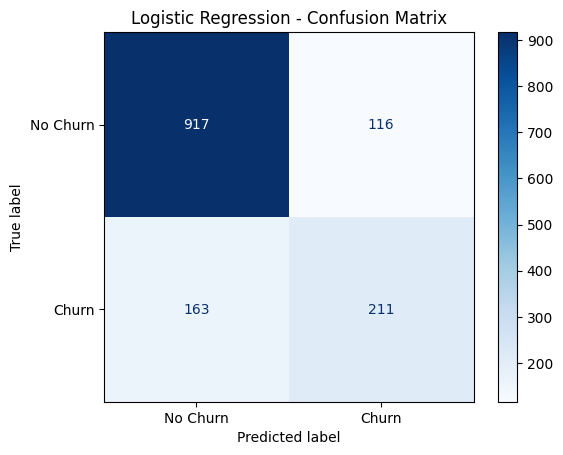

In [36]:
#Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_log = confusion_matrix(y_test, log_reg_pred)
disp = ConfusionMatrixDisplay(cm_log, display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


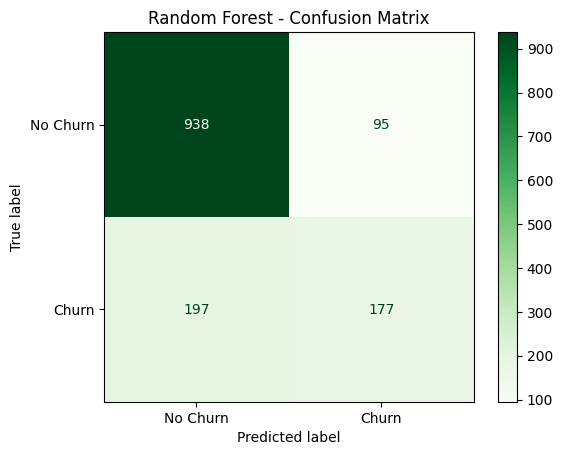

In [37]:
#Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(cm_rf, display_labels=["No Churn", "Churn"])
disp.plot(cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.show()


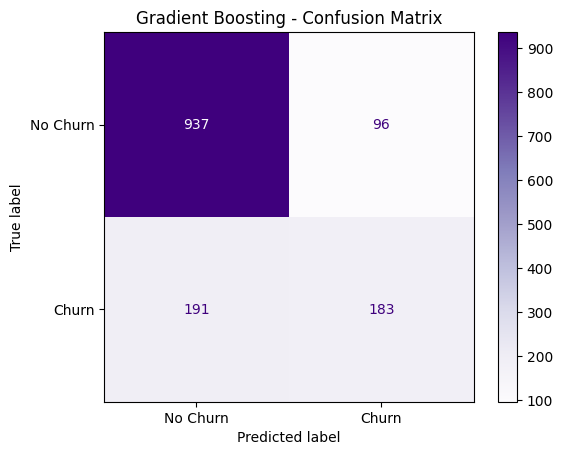

In [38]:
#Confusion Matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, gb_pred)
disp = ConfusionMatrixDisplay(cm_gb, display_labels=["No Churn", "Churn"])
disp.plot(cmap="Purples")
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()


### Confusion Matrix Analysis

The confusion matrices provide deeper insight into model performance:

- **Logistic Regression** correctly identifies more churners (higher true positives) and misses fewer churners (lower false negatives).  
  This aligns with its highest Recall and F1-score.

- **Random Forest** has the highest number of false negatives.  
  This explains why its recall and F1-score are the lowest of the three models.

- **Gradient Boosting** performs better than Random Forest but still misses more churners compared to Logistic Regression.

Overall, Logistic Regression provides the best balance for identifying churn, which supports selecting it as the final model.


# Customer Churn Prediction Report

## 1. Introduction
Customer churn refers to customers leaving a service provider. Predicting churn helps telecom companies identify at-risk customers and take action to retain them.

The aim of this project is to build machine learning models that predict whether a customer will churn using the Telco Customer Churn dataset.

---

## 2. Dataset Description
The dataset contains customer information such as:
- Demographics (gender, age)
- Account details (tenure, contract type)
- Billing information (monthly charges, total charges)
- Subscription services (internet type, security options)
- Churn (Yes/No)

Target variable: **Churn**  
Dataset size: **rows × columns will be shown by `df.shape` in notebook**

---

## 3. Data Cleaning and Preparation
### Steps performed:
- Fixed incorrect data types (e.g., `TotalCharges` converted to numeric)
- Removed missing values
- Encoded categorical variables using one-hot encoding
- Created new feature **AvgMonthlySpend**
- Split data into training and testing sets (80/20)

---

## 4. Exploratory Data Analysis (EDA)
Key findings:
- Customers with **shorter tenure** were more likely to churn.
- Customers with **higher monthly charges** had a higher churn rate.
- Contract type strongly influenced churn (month-to-month contracts churned the most).
- The dataset is moderately imbalanced (more non-churners than churners).

Visualisations included:
- Churn count plot  
- Distributions of monthly charges and tenure  
- Boxplots comparing churn vs. important features  
- Correlation analysis for numeric variables  

---

## 5. Model Building

Three models were trained:

### 5.1 Logistic Regression
- Acts as the baseline model  
- Fast to train and highly interpretable  
- Performed the best overall  
- Highest recall and F1-score  

### 5.2 Random Forest
- Tree-based ensemble model  
- Performed weaker on recall  
- Missed many churn cases  
- Lowest F1-score  

### 5.3 Gradient Boosting
- Advanced sequential ensemble  
- Strong precision but still lower F1 than Logistic Regression  
- Middle performer  

---

## 6. Model Performance Comparison

| Model | Accuracy | Precision | Recall | F1-Score |
|-------|----------|-----------|--------|----------|
| Logistic Regression | 0.801706 | 0.645260 | 0.564171 | 0.601997 |
| Random Forest | 0.792466 | 0.650735 | 0.473262 | 0.547988 |
| Gradient Boosting | 0.796020 | 0.655914 | 0.489305 | 0.560490 |

(Logreg is highest in F1 and Recall.)

Confusion matrices were also generated for each model to visualize true/false positives and negatives.

---

## 7. Final Model Selection
The final model chosen is **Logistic Regression** because:
- It achieved the highest F1-score  
- It had the highest recall (important for catching churners)  
- It performed consistently well despite being a simple model  
- It avoided the high false-negative problem seen in Random Forest and Gradient Boosting  

This confirms that simple models can outperform more complex ones depending on the dataset.

---

## 8. Conclusion
This project successfully:
- Cleaned and explored the dataset  
- Engineered new features  
- Built and evaluated three machine learning models  
- Identified Logistic Regression as the best churn predictor  

Future improvements:
- Hyperparameter tuning  
- Better class balancing (SMOTE)  
- Adding more customer behaviour features  
- Deployment using Streamlit  

---


### DEPLOYMENT MODEL (LOGISTIC REGRESSION PIPELINE)

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import joblib


In [40]:
# X and y for deployment model (from cleaned df)
X_deploy = df.drop(columns=["Churn"])
y_deploy = df["Churn"]

numeric_features = X_deploy.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_deploy.select_dtypes(include=["object", "bool"]).columns.tolist()

numeric_features, categorical_features


(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'],
 ['customerID',
  'gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'])

In [ ]:
#Preprocessing and pipeline setup
numeric_transformer = "passthrough"

categorical_transformer = OneHotEncoder(
    handle_unknown="ignore",
    drop="first"
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

deploy_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("classifier", LogisticRegression(max_iter=5000))
    ]
)


In [42]:
#Train-test split for deployment model
from sklearn.model_selection import train_test_split

X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(
    X_deploy, y_deploy, test_size=0.2, random_state=42, stratify=y_deploy
)

deploy_pipeline.fit(X_train_dep, y_train_dep)


c:\Users\Naada Hussein\OneDrive\Desktop\customer-churn-prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [43]:
#Checking performance of deployment model
from sklearn.metrics import accuracy_score, f1_score

y_pred_dep = deploy_pipeline.predict(X_test_dep)
print("Deployment model accuracy:", accuracy_score(y_test_dep, y_pred_dep))
print("Deployment model F1:", f1_score(y_test_dep, y_pred_dep))


Deployment model accuracy: 0.8038379530916845
Deployment model F1: 0.6068376068376068


c:\Users\Naada Hussein\OneDrive\Desktop\customer-churn-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [44]:
#Saving the model
import os

models_dir = os.path.join("..", "models")
os.makedirs(models_dir, exist_ok=True)

model_path = os.path.join(models_dir, "churn_logreg_pipeline.pkl")
joblib.dump(deploy_pipeline, model_path)

model_path


'..\\models\\churn_logreg_pipeline.pkl'

#  Model Deployment & How to Use the Churn Prediction App

We deployed the final Logistic Regression churn model using **Streamlit Cloud** to make it easy for anyone to test the model without running code. The deployment includes the saved model (**final_model.pkl**) and preprocessing pipeline (**preprocessor.pkl**), which are loaded inside a Streamlit script (**streamlit_app.py**).

The app allows users to input customer details (such as tenure, contract type, monthly charges, etc.). These inputs are preprocessed the same way as in training and passed into the model to predict whether the customer is likely to churn, along with the probability score.

###  How the App Was Deployed
- Created **streamlit_app.py** to handle inputs, preprocessing, and predictions.  
- Saved the trained model and preprocessor using **joblib**.  
- Added all required files to GitHub, including **requirements.txt**.  
- Connected the repository to **Streamlit Cloud** and selected the app file to deploy.  
- Streamlit automatically built and hosted the app online.

###  How to Use the App
1. Open the app: **https://customer-churn-predictionj.streamlit.app**  
2. Use the **sidebar** to enter customer information.  
3. Review the **Customer Summary** table showing the exact data the model will use.  
4. Click **Predict Churn**.  
5. The app will display:  
   - **Churn Prediction (Yes/No)**  
   - **Churn Probability (%)**  
6. Adjust the inputs to see how different factors affect churn risk.

This deployment demonstrates how machine learning models can be turned into real, interactive tools that support decision-making in real-world scenarios.
